# Thực hành EDA vớ dữ liệu Tài chính

In [1]:
# Import thư viện
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override()

**Mục đích:**  
Đoạn code này nhập các thư viện cần thiết để làm việc với dữ liệu tài chính:  
- `from IPython.display import display`: hỗ trợ hiển thị trực quan các bảng dữ liệu trong notebook.  
- `import yfinance as yf`: dùng để tải dữ liệu tài chính (ví dụ cổ phiếu, chỉ số, tiền tệ) trực tiếp từ Yahoo Finance.

In [3]:
# Thiết lập khoảng thời gian và phong cách biểu đồ
sns.set_style('whitegrid')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 1, 1)

# Tải dữ liệu từ Yahoo Finance
# df = web.DataReader('AAPL', start, end)
df = yf.download('AAPL', start=start, end=end)
df = df.xs('AAPL', axis=1, level='Ticker')

/tmp/ipython-input-2126878846.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


**Mục đích:**  
Đoạn code này thiết lập môi trường và tải dữ liệu giá cổ phiếu Apple (mã `AAPL`) trong giai đoạn từ **01/01/2017 đến 01/01/2021** từ **Yahoo Finance**.  

**Giải thích chi tiết:**  
- `sns.set_style('whitegrid')`: đặt phong cách hiển thị biểu đồ có nền lưới trắng, giúp dễ quan sát.  
- `start` và `end`: xác định mốc thời gian cần lấy dữ liệu.  
- `yf.download('AAPL', start=start, end=end)`: tải dữ liệu lịch sử giá cổ phiếu Apple.  
- `df.xs('AAPL', axis=1, level='Ticker')`: nếu dữ liệu chứa nhiều mã cổ phiếu, dòng này chọn riêng dữ liệu của **AAPL**.  

Kết quả là `df` chứa các cột như **Open, High, Low, Close, Adj Close, Volume** — dữ liệu giá cổ phiếu Apple theo ngày.

In [4]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv', parse_dates=True, index_col='Date')

In [5]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.796831,26.838359,26.476146,26.716083,115127600
2017-01-04,26.766838,26.879887,26.704547,26.727618,84472400
2017-01-05,26.902958,26.960635,26.718390,26.743768,88774400
2017-01-06,27.202883,27.260560,26.870661,26.942181,127007600
2017-01-09,27.452051,27.553564,27.209808,27.212114,134247600
...,...,...,...,...,...
2020-12-24,128.591019,130.042874,127.743299,127.957667,54930100
2020-12-28,133.190201,133.823552,130.091614,130.559334,124486200
2020-12-29,131.416809,135.236440,130.900380,134.515397,121047300


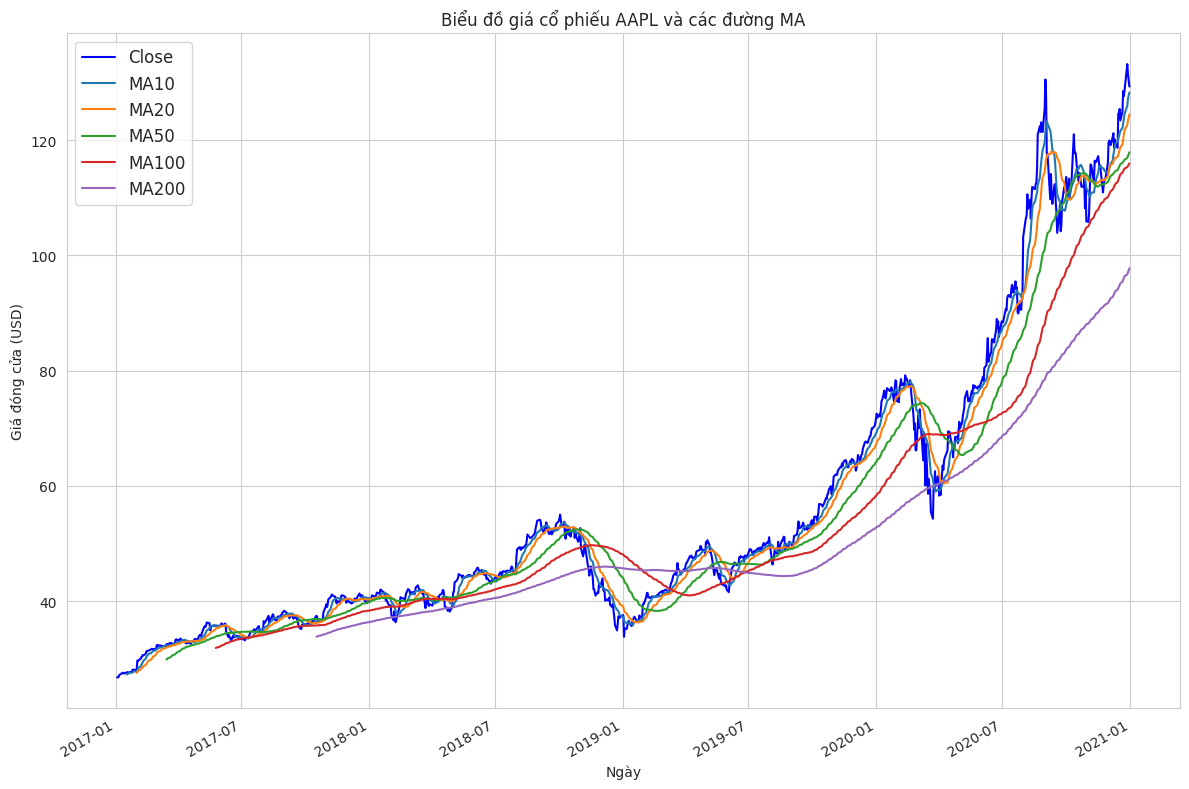

In [6]:
# Làm sạch dữ liệu
df = df.dropna()
df = df[df['Close'] != 0]

# Tính các đường trung bình động
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Vẽ biểu đồ giá đóng cửa và các đường MA
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')

# Thiết lập nhãn và tiêu đề
plt.title('Biểu đồ giá cổ phiếu AAPL và các đường MA')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (USD)')
plt.legend(loc='upper left', fontsize=12)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('AAPL_plot.png', dpi=300)
plt.show()


**Mục đích:**  
Đoạn code này thực hiện **làm sạch dữ liệu**, **tính các đường trung bình động (Moving Averages – MA)**, và **vẽ biểu đồ giá cổ phiếu AAPL** để quan sát xu hướng biến động giá theo thời gian.  

**Cụ thể:**  
- `df.dropna()` và `df[df['Close'] != 0]`: loại bỏ các giá trị bị thiếu hoặc những ngày có giá đóng cửa bằng 0, đảm bảo dữ liệu sạch và hợp lệ.  
- `df['MA10']`, `df['MA20']`, `df['MA50']`, `df['MA100']`, `df['MA200']`: tạo các cột trung bình động trong 10, 20, 50, 100 và 200 ngày — giúp nhận biết xu hướng ngắn, trung và dài hạn.  
- Biểu đồ:  
  - Đường **màu xanh dương** thể hiện giá đóng cửa thực tế.  
  - Các đường MA giúp làm mượt chuỗi giá, hỗ trợ nhà đầu tư xác định **xu hướng tăng/giảm** của cổ phiếu.  
- Cuối cùng, `plt.savefig('AAPL_plot.png')` lưu biểu đồ thành file ảnh để sử dụng hoặc báo cáo.  

**Ý nghĩa:**  
Việc kết hợp các đường trung bình động giúp đánh giá xu hướng thị trường — ví dụ, khi đường MA ngắn hạn cắt lên MA dài hạn, có thể báo hiệu **tín hiệu mua**; ngược lại, là **tín hiệu bán**.